In [15]:
import numpy as np
import pandas as pd
from dowhy import CausalModel

In [16]:
dataolah = pd.read_csv('datafinal nich.csv', sep=";")

In [17]:
for col in dataolah.columns:
    if dataolah[col].dtypes == "object":
      dataolah[col] = dataolah[col].astype("category")

In [18]:
dataolah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   X1            755 non-null    category
 1   X2            755 non-null    category
 2   X3            755 non-null    category
 3   X4            755 non-null    category
 4   X5            755 non-null    category
 5   X6            755 non-null    category
 6   X7            755 non-null    int64   
 7   X8            755 non-null    category
 8   X9            755 non-null    category
 9   X10           755 non-null    float64 
 10  X11           755 non-null    bool    
 11  X12           755 non-null    int64   
 12  X13           755 non-null    int64   
 13  Y             755 non-null    int64   
 14  Tanggal PR    755 non-null    category
 15  Tanggal PO    755 non-null    category
 16  Tgl Delivery  755 non-null    category
 17  Tanggal GR    755 non-null    category
dtypes: bool(1)

In [19]:
dataolah

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,Y,Tanggal PR,Tanggal PO,Tgl Delivery,Tanggal GR
0,0LBKT00008,P1370,YKPN,B1B2B3,Tiga,April,1000,CREATIVE DIGITAL PRINTING DAN COPY,non-afiliasi,9.6,False,12,13,1,26/04/2022,27/04/2022,09/05/2022,10/05/2022
1,0LBKT00008,P1370,YKPN,B1B2B3,Tiga,Juni,1160,CREATIVE DIGITAL PRINTING DAN COPY,non-afiliasi,9.6,False,12,14,2,21/06/2022,22/06/2022,04/07/2022,06/07/2022
2,0LBKT00008,P1370,YKPN,B1B2B3,Tiga,Juni,1000,CREATIVE DIGITAL PRINTING DAN COPY,non-afiliasi,9.6,True,12,15,3,29/06/2022,29/06/2022,11/07/2022,14/07/2022
3,0LBKT00008,P1370,YKPN,B1B2B3,Tiga,Juli,1325,CREATIVE DIGITAL PRINTING DAN COPY,non-afiliasi,9.6,True,14,16,2,04/07/2022,04/07/2022,18/07/2022,20/07/2022
4,0LBKT00008,P1370,YKPN,B1B2B3,Tiga,Juli,1000,CREATIVE DIGITAL PRINTING DAN COPY,non-afiliasi,9.6,True,14,17,3,11/07/2022,11/07/2022,25/07/2022,28/07/2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,ZB0173KL06,P1370,YPCG,B1B2,Dua,Oktober,40,PUTRA PALLET,non-afiliasi,13.0,False,14,27,13,17/10/2022,18/10/2022,01/11/2022,14/11/2022
751,ZB0173KL06,P1370,YPCG,B1B2,Dua,Oktober,30,PUTRA PALLET,non-afiliasi,13.0,True,14,15,1,31/10/2022,31/10/2022,14/11/2022,15/11/2022
752,ZB0173KL06,P1370,YPCG,B1B2,Dua,November,20,PUTRA PALLET,non-afiliasi,13.0,False,13,23,10,07/11/2022,08/11/2022,21/11/2022,01/12/2022
753,ZB0173KL06,P1370,YPCG,B1B2,Dua,November,20,PUTRA PALLET,non-afiliasi,13.0,False,13,23,10,07/11/2022,08/11/2022,21/11/2022,01/12/2022


In [20]:
dataolah = dataolah.drop(columns=['X2', 'X3', 'X4', 'X5', 'X9', 'X13', 'Tanggal PR', 'Tanggal PO', 'Tgl Delivery', 'Tanggal GR'])

In [21]:
dataolah

,X1,X6,X7,X8,X10,X11,X12,Y
0,0LBKT00008,April,1000,CREATIVE DIGITAL PRINTING DAN COPY,9.6,False,12,1
1,0LBKT00008,Juni,1160,CREATIVE DIGITAL PRINTING DAN COPY,9.6,False,12,2
2,0LBKT00008,Juni,1000,CREATIVE DIGITAL PRINTING DAN COPY,9.6,True,12,3
3,0LBKT00008,Juli,1325,CREATIVE DIGITAL PRINTING DAN COPY,9.6,True,14,2
4,0LBKT00008,Juli,1000,CREATIVE DIGITAL PRINTING DAN COPY,9.6,True,14,3
...,...,...,...,...,...,...,...,...
750,ZB0173KL06,Oktober,40,PUTRA PALLET,13.0,False,14,13
751,ZB0173KL06,Oktober,30,PUTRA PALLET,13.0,True,14,1
752,ZB0173KL06,November,20,PUTRA PALLET,13.0,False,13,10
753,ZB0173KL06,November,20,PUTRA PALLET,13.0,False,13,10


In [10]:
import networkx as nx
causal_graph = nx.DiGraph([
                           ("X1", "X11"),
                           ("X1", "X7"),
                           ("X1", "X8"),
                           ("X6", "X11"),
                           ("X6", "Y"),
                           ("X7", "Y"),
                           ("X8", "X10"),
                           ("X8", "Y"),
                           ("X10", "Y"),
                           ("X11", "Y"),
                           ("X12", "Y")])

In [11]:
nx.write_gml(causal_graph, "causal_graph final.gml")

In [22]:
# With graph
model=CausalModel(
        data = dataolah,
        treatment='X11',
        outcome='Y',
        graph="causal_graph final.gml"
        )

In [13]:
model.get_common_causes()

['X1', 'X6']

In [14]:
model.get_effect_modifiers()
#MODIFIER ADALAH VARIABEL YANG MEMPENGARUHI OUTCOME NAMUN TIDAK MEMPENGARUHI TREATMENT

['X7', 'X12', 'X8', 'X10']

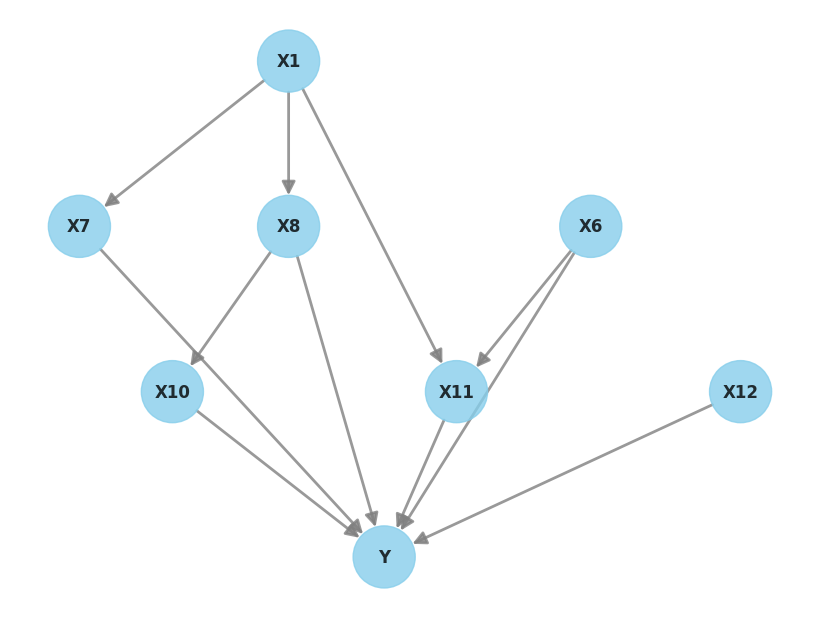

In [15]:
model.view_model()

In [23]:
identified_estimand = model.identify_effect(optimize_backdoor=True, proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d               
──────(E[Y|X1,X6])
d[X₁₁]            
Estimand assumption 1, Unconfoundedness: If U→{X11} and U→Y then P(Y|X11,X1,X6,U) = P(Y|X11,X1,X6)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [24]:
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_matching",
        target_units="atc",
        test_significance=True,
        confidence_intervals=True)
print(causal_estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d               
──────(E[Y|X1,X6])
d[X₁₁]            
Estimand assumption 1, Unconfoundedness: If U→{X11} and U→Y then P(Y|X11,X1,X6,U) = P(Y|X11,X1,X6)

## Realized estimand
b: Y~X11+X1+X6
Target units: atc

## Estimate
Mean value: -2.232919254658385
p-value: [0.999, 1]
95.0% confidence interval: (-2.997889791368052, -1.554166585026549)



In [27]:
causal_estimate2 = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_matching",
        target_units="ate",
        test_significance=True,
        confidence_intervals=True)
print(causal_estimate2)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d               
──────(E[Y|X1,X6])
d[X₁₁]            
Estimand assumption 1, Unconfoundedness: If U→{X11} and U→Y then P(Y|X11,X1,X6,U) = P(Y|X11,X1,X6)

## Realized estimand
b: Y~X11+X1+X6
Target units: ate

## Estimate
Mean value: 0.05562913907284768
p-value: [0.999, 1]
95.0% confidence interval: (-0.26887417218543047, 0.656953642384106)



In [11]:
# Textual Interpreter
interpretation = causal_estimate.interpret(method_name="textual_effect_interpreter")

Increasing the treatment variable(s) [X11] from 0 to 1 causes an increase of -2.232919254658385 in the expected value of the outcome [['Y']], over the data distribution/population represented by the dataset.


In [12]:
namafile = "res_random final bgt.txt"
filehandler = open(namafile, "w")
filehandler.write("HASIL RES RANDOM FINAL")
filehandler = open(namafile, "a")
for i in range(1,31):
  res_random=model.refute_estimate(identified_estimand, causal_estimate, method_name="random_common_cause",
                                   num_simulations=10000, n_jobs=-1, show_progress_bar=True)
  print(i, file=filehandler)
  print(res_random, file=filehandler)
filehandler = open(namafile, "a")
filehandler.write("SELESAI")

Refuting Estimates: 100%|██████████| 10000/10000 [19:06<00:00,  8.72it/s]


In [13]:
namafile = "res_subset final bgt.txt"
filehandler = open(namafile, "w")
filehandler.write("HASIL RES SUBSET BARU")
filehandler = open(namafile, "a")
for i in range(1,31):
  res_subset=model.refute_estimate(identified_estimand, causal_estimate,
                                   method_name="data_subset_refuter", subset_fraction=0.3, n_jobs=-1, num_simulations=10000, show_progress_bar=True)
  print(i, file=filehandler)
  print(res_subset, file=filehandler)
filehandler = open(namafile, "a")
filehandler.write("SELESAI")

Refuting Estimates:   0%|          | 16/10000 [00:00<02:56, 56.50it/s]

Refuting Estimates: 100%|██████████| 10000/10000 [06:50<00:00, 24.38it/s]
